#### Simple Sales Analysis Questions that may come up
* What was the best month for sales? How much was earned that month?
* What city sold the most product?
* What time should we display advertisemens to maximize the likelihood of customer’s buying product?
* What products are most often sold together?
* What product sold the most? Why do you think it sold the most?

In [1]:

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#### merge 12 month of sales data 

In [2]:
#read csv in a folder 
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#listing and reading all files of a directory

import os
# help list file in folders 
files =[file for file in os.listdir('./Sales_Data')]

for file in files:
    print (file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:


#empty data frame that will contain 12 month data AFTERWARD 
all_months_data= pd.DataFrame()

files =[file for file in os.listdir('./Sales_Data')]

for file in files:
    
    df=pd.read_csv("./Sales_Data/"+file)
    # Concatenating multiple csvs together to create a new DataFrame (pd.concat) 
    all_months_data=pd.concat([all_months_data, df])

all_months_data.head()    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
files =[file for file in os.listdir('./Sales_Data')]

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)

In [6]:
#save all months data as csv
all_months_data.to_csv("all_data.csv",index=False)

In [7]:
#read the new csv containing all data 
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### drop rows of NAN

In [8]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


# Clean up the data 

In [9]:
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
#find or and delete it'
temp_df=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### convert columns to correct type 

In [13]:
#make int
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])

#make float 
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])


#### Augment the data with addtional column

#### add month column

In [26]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.tail(30)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
186819,259329,Lightning Charging Cable,1,14.95,09/05/19 19:00,"480 Lincoln St, Atlanta, GA 30301",9,14.95,Atlanta (GA),19,0,1
186820,259330,AA Batteries (4-pack),2,3.84,09/25/19 22:01,"763 Washington St, Seattle, WA 98101",9,7.68,Seattle (WA),22,1,1
186821,259331,Apple Airpods Headphones,1,150.00,09/29/19 07:00,"770 4th St, New York City, NY 10001",9,150.00,New York City (NY),7,0,1
186822,259332,Apple Airpods Headphones,1,150.00,09/16/19 19:21,"782 Lake St, Atlanta, GA 30301",9,150.00,Atlanta (GA),19,21,1
186823,259333,Bose SoundSport Headphones,1,99.99,09/19/19 18:03,"347 Ridge St, San Francisco, CA 94016",9,99.99,San Francisco (CA),18,3,1
186824,259334,USB-C Charging Cable,1,11.95,09/27/19 10:52,"276 14th St, Atlanta, GA 30301",9,11.95,Atlanta (GA),10,52,1
186825,259335,Lightning Charging Cable,1,14.95,09/26/19 17:21,"791 Forest St, Seattle, WA 98101",9,14.95,Seattle (WA),17,21,1
186827,259336,AAA Batteries (4-pack),3,2.99,09/25/19 00:13,"753 14th St, Boston, MA 02215",9,8.97,Boston (MA),0,13,1
186828,259337,USB-C Charging Cable,1,11.95,09/19/19 17:34,"495 Park St, Boston, MA 02215",9,11.95,Boston (MA),17,34,1
186829,259338,AAA Batteries (4-pack),2,2.99,09/02/19 21:29,"666 Lakeview St, Boston, MA 02215",9,5.98,Boston (MA),21,29,1


#### add sales column

In [27]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


# 1)What was the best month for sales? How much was earned that month?

In [28]:
#TOTAL SALES (REVENUE 2019)
all_data['Sales'].sum()

34492035.97

In [29]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales,Hour,Minute,Count
Month,,,,,,
1,10903,1.811768e+06,1.822257e+06,139485,282440,9709
2,13449,2.188885e+06,2.202022e+06,172669,354885,11975
3,17005,2.791208e+06,2.807100e+06,218969,447559,15153
4,20558,3.367671e+06,3.390670e+06,262259,544186,18279
5,18667,3.135125e+06,3.152607e+06,238780,487899,16566
6,15253,2.562026e+06,2.577802e+06,195528,402436,13554
7,16072,2.632540e+06,2.647776e+06,206169,417349,14293
8,13448,2.230345e+06,2.244468e+06,172289,353857,11961
9,13109,2.084992e+06,2.097560e+06,168513,341698,11621


In [30]:
results=all_data.groupby('Month').sum()

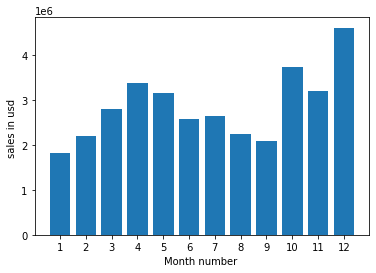

In [31]:
import matplotlib.pyplot as plt
months =range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('sales in usd ')
plt.xlabel('Month number ')
plt.show()


# What city sold the most product?

#### add city column

In [32]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [33]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
City,,,,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,214264,442932,14881
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,141946,289060,9905
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,288225,590442,19934
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,214390,435155,14820
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,427444,866638,29605
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,357696,733598,24876
Portland (ME),2750,4.471893e+05,17144,4.497583e+05,35211,72856,2455
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,144421,295533,10010
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,643265,1319477,44732


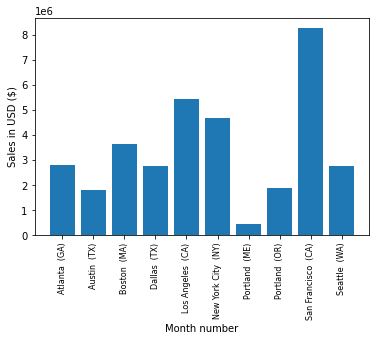

In [34]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

# What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [35]:

# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


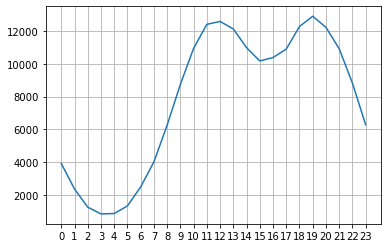

In [36]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

# What products are most often sold together?

In [37]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [38]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0,1
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0,1
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7,1
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7,1


In [39]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [40]:
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [41]:
from itertools import combinations
from collections import Counter

count =Counter()

for row in df['Grouped']:
    row_list =row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# What product sold the most? Why do you think it sold the most?

In [42]:
product_group=all_data.groupby('Product')

In [43]:
print(product_group.sum())

                            Quantity Ordered  Price Each   Month       Sales  \
Product                                                                        
20in Monitor                            4129   451068.99   29336   454148.71   
27in 4K Gaming Monitor                  6244  2429637.70   44440  2435097.56   
27in FHD Monitor                        7550  1125974.93   52558  1132424.50   
34in Ultrawide Monitor                  6199  2348718.19   43304  2355558.01   
AA Batteries (4-pack)                  27635    79015.68  145558   106118.40   
AAA Batteries (4-pack)                 31017    61716.59  146370    92740.83   
Apple Airpods Headphones               15661  2332350.00  109477  2349150.00   
Bose SoundSport Headphones             13457  1332366.75   94113  1345565.43   
Flatscreen TV                           4819  1440000.00   34224  1445700.00   
Google Phone                            5532  3315000.00   38305  3319200.00   
LG Dryer                                

In [44]:
quantity_ordered=product_group.sum()['Quantity Ordered']

In [45]:
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

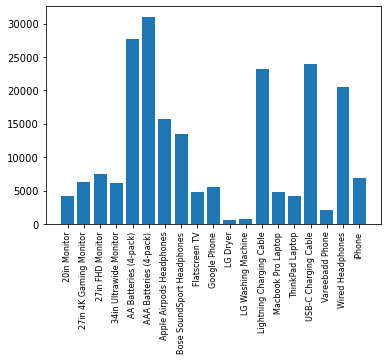

In [46]:


products=[ product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=8)
plt.show

In [47]:
prices=all_data.groupby('Product').mean()['Price Each']
print (prices)


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


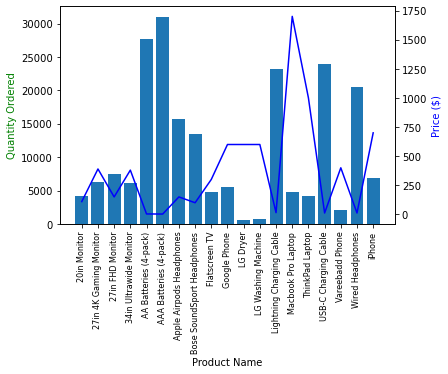

In [48]:

# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
#ax1.bar(products, quantity_ordered, color='g')
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()